## Image Classification on MNIST Data

1) Load the Data

In [10]:
import gzip
from mlxtend.data import loadlocal_mnist
import numpy as np

files = {
    "X": "train-images-idx3-ubyte",
    "y": "train-labels-idx1-ubyte",
    "X_test": "t10k-images-idx3-ubyte",
    "y_test": "t10k-labels-idx1-ubyte"
}

# Code to load the binary files.
# https://github.com/rasbt/mlxtend/blob/master/mlxtend/data/local_mnist.py

X, y = loadlocal_mnist(images_path = files['X'], labels_path = files['y'])
X_test, y_test = loadlocal_mnist(images_path = files['X_test'], labels_path = files['y_test'])

print("Train -> ", X.shape)
print("Test -> ", X_test.shape)

Train ->  (60000, 784)
Test ->  (10000, 784)


Splitting the data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training -> ", X_train.shape)
print("Validation -> ", X_val.shape)

Training ->  (48000, 784)
Validation ->  (12000, 784)


Visualize the Digits

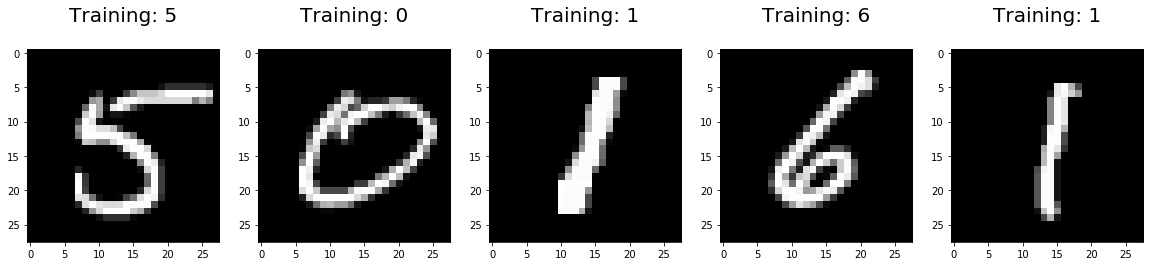

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Apply Logistics Regression on the data

In [13]:
# Function to store the predicted result into a CSV file as required
def createCSV(result, name):
    arr = np.zeros((len(result), 10), dtype = 'int32')
    arr = np.matrix(arr)
    
    for index, val in enumerate(result):
        arr[index, val] = 1
        
    np.savetxt(name, arr, fmt = '%i', delimiter = ",")

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression(n_jobs=1, max_iter=500, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_pred_lr, y_test)
print('Accuracy of Logistics Regression: {}'.format(acc_lr))
createCSV(y_pred_lr, "lr.csv")

Accuracy of Logistics Regression: 0.9178


/anaconda3/envs/deeplearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [17]:
rfc = RandomForestClassifier(n_jobs = 1, n_estimators = 500, max_features = 'auto', random_state = 42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy of Random Forest: {}'.format(acc_rf))
createCSV(y_pred_rf, "rf.csv")

Accuracy of Random Forest: 0.9704
